# Handling outliers

Viri:
- [Detecting and Handling Outliers Properly](https://medium.com/analytics-vidhya/detect-and-handling-outliers-53723d8ec17a)
- [Outliers in Data: How to Find and Deal with Them in Satistics](https://cxl.com/blog/outliers/)
- [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**An outlier is a data point that is significantly different from the remaining data.** 
- **Statistical parameters** such as the mean and variance are **sensitive** to outliers. 
- Outliers may also affect the performance of some machine learning models, such as **linear regression or AdaBoost**



## Trimming outliers from the dataset

**Trimming, or truncating, is the process of removing observations that show outliers in one
or more variables in the dataset.** 

There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier.
- If the variable is **normally distributed**, the boundaries are given by the mean plus or minus three times the standard deviation, as approximately 99% of the data will be distributed between those limits. 
- For **normally, as well as not normally, distributed** variables, we can determine the limits using the inter-quartile range proximity rules or by directly setting the limits to the 5th and 95th quantiles.

In [3]:
boston = pd.read_csv("data/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


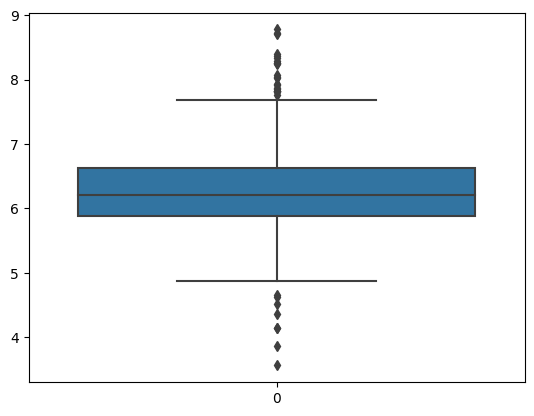

In [4]:
# The outliers are the asterisks sitting outside the whiskers, which delimit the interquartile range proximity rule boundaries:
sns.boxplot(boston['RM'])
plt.show()

In [5]:
def find_boundaries(df, variable, distance, rule="inter-quartile"):
    if rule == "inter-quartile":
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
        return upper_boundary, lower_boundary
    elif rule == "meanstddev":
        lower_boundary = df[variable].mean() - (df[variable].std() * distance)
        upper_boundary = df[variable].mean() + (df[variable].std() * distance)
        return upper_boundary, lower_boundary

In [6]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 1.5)

In [7]:
# Let's print those limits beyond which we will consider a value an outlier:
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [8]:
outliers_RM = np.where(boston['RM'] > RM_upper_limit, True, np.where(boston['RM'] < RM_lower_limit, True, False))
boston_trimmed = boston.loc[~(outliers_RM)]

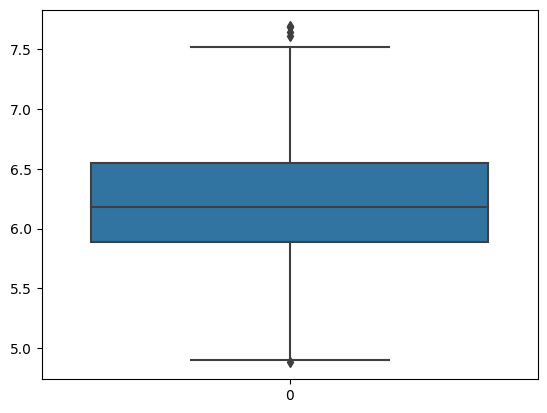

In [9]:
sns.boxplot(boston_trimmed['RM'])
plt.show()

In [10]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 3, rule="meanstddev")
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)